Machine Learning Foundation 

Dialog Data Science Academy 

Capstone Project 

Niroshan Balasuriya

# Loading Libraries 


In [18]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
import seaborn as sns

import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Mount Google Drive for Testing Purpose

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [20]:
# From URL (GitHub raw file link)
# file_path_url= 'https://raw.githubusercontent.com/'

# From Google Drive
file_path_ws = '/content/drive/My Drive/Data/dataR2.csv' 

# Load CSV File

#data = pd.read_csv(file_path_url)
data = pd.read_csv(file_path_ws)
data.sample(20)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1
21,34,31.975015,87,4.530,0.972138,28.7502,7.642760,5.62592,572.783,1
51,77,25.900000,85,4.580,0.960273,13.7400,9.753260,11.77400,488.829,1
22,29,32.270788,84,5.810,1.203832,45.6196,6.209635,24.60330,904.981,1
103,72,29.136316,83,10.949,2.241625,26.8081,2.784910,14.76966,232.018,2
101,66,26.562500,89,6.524,1.432235,14.9084,8.429960,14.91922,269.487,2
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
25,45,37.035608,83,6.760,1.383997,39.9802,4.617125,8.70448,586.173,1
39,77,35.587929,76,3.881,0.727558,21.7863,8.125550,17.26150,618.272,1
104,57,34.838148,95,12.548,2.940415,33.1612,2.364950,9.95420,655.834,2


# Pre-process Data for Training

In [21]:
# check width (number of columns) and height (number of rows)
data.shape

(116, 10)

In [22]:
# Check Columns and thier Data Types
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [23]:
# Data Frame Info (Row count, Columns, Non-Null Count, Data Types)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [24]:
#list down the columns 
data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [25]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Age,116.0,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.0,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
HOMA,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.0,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.0,10.180874,6.843341,1.656020,5.474283,8.352692,11.815970,38.040000
Resistin,116.0,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
MCP.1,116.0,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
Classification,116.0,1.551724,0.499475,1.000000,1.000000,2.000000,2.000000,2.000000


In [26]:
# Finding the missing values
#print(data.isna())
print(data.isna().all())

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool


In [27]:
# Finding the null values
#print(data.isnull())
print(data.isnull().all())

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool


In [60]:
# Data Set selected is not having any missing data or data that needs to be corrected. 

In [28]:
cormat = data.corr()
round(cormat,2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.00,0.01,0.23,0.03,0.13,0.10,-0.22,0.00,0.01,-0.04
BMI,0.01,1.00,0.14,0.15,0.11,0.57,-0.30,0.20,0.22,-0.13
Glucose,0.23,0.14,1.00,0.50,0.70,0.31,-0.12,0.29,0.26,0.38
Insulin,0.03,0.15,0.50,1.00,0.93,0.30,-0.03,0.15,0.17,0.28
HOMA,0.13,0.11,0.70,0.93,1.00,0.33,-0.06,0.23,0.26,0.28
Leptin,0.10,0.57,0.31,0.30,0.33,1.00,-0.10,0.26,0.01,-0.00
Adiponectin,-0.22,-0.30,-0.12,-0.03,-0.06,-0.10,1.00,-0.25,-0.20,-0.02
Resistin,0.00,0.20,0.29,0.15,0.23,0.26,-0.25,1.00,0.37,0.23
MCP.1,0.01,0.22,0.26,0.17,0.26,0.01,-0.20,0.37,1.00,0.09
Classification,-0.04,-0.13,0.38,0.28,0.28,-0.00,-0.02,0.23,0.09,1.00


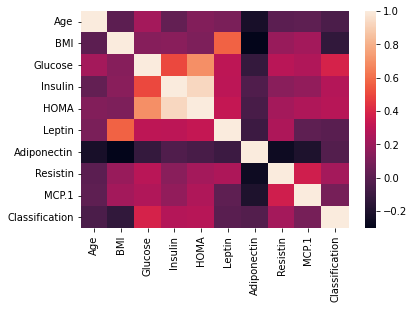

In [29]:
import seaborn as sns
sns.heatmap(cormat)

## Create ID Column

In [30]:
data['id'] = data.index+1
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,id
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,2
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,3
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,4
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,5
...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,112
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,113
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,114
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,115


# Age as a Variable

In [32]:
data['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [33]:
#data.groupby(by='Age')['id'].count()
data.groupby(by=['Classification']).agg({'Age': ['min', 'max', 'mean', 'std']})

Age                          
               min max       mean        std
Classification                              
1               24  89  58.076923  18.957999
2               34  86  56.671875  13.493155

In [34]:
data['Age'].unique()

array([48, 83, 82, 68, 86, 49, 89, 76, 73, 75, 34, 29, 25, 24, 38, 44, 47,
       61, 64, 32, 36, 35, 54, 45, 50, 66, 53, 28, 43, 51, 67, 69, 60, 77,
       71, 78, 85, 42, 62, 59, 46, 72, 55, 41, 81, 65, 58, 40, 52, 74, 57])

In [35]:
data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification', 'id'],
      dtype='object')

In [36]:
X_variables = ['Age',  'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
data[X_variables].head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [37]:
y_varibale = 'Classification'
data[y_varibale].head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [38]:
X = data[X_variables].values

In [39]:
y = data[y_varibale].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

# Data Pre-processing Function

In [40]:
def pre_processing(data):    
    data['id'] = data.index+1

    
    # Select Columns
    X_variables = ['Age',  'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
    
    # Assign 0 to missing columns
    for x in list(set(X_variables) - set(data.columns)):
        data[x] = 0
        
    return data[X_variables]

# Train Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 81
Test sample size  = 35


# Model Training

In [42]:
#Training Function 
#Prediction also included
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    #Prediction
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
    #test_result.sample(10)

    #Model Evaluation
    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  'test':test_result.sample(10),
                  })

In [43]:
#Train the model & do the prediction
#RandomForest Classifier
model0 = model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf_new0', X_train, y_train, X_test, y_test)
#Print the output
model0

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


{'accuracy': 0.6571428571428571,
 'f1_score': 0.6571428571428571,
 'model': RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1),
 'model_name': 'rf_new0',
 'precision': 0.6470588235294118,
 'roc_auc': 0.7712418300653594,
 'test':     y_act  y_pred  y_pred_prob
 2       1       1        0.102
 12      2       2        0.888
 23      1       1        0.140
 13      2       1        0.392
 34      2       2        0.854
 11      1       2        0.742
 16      2       2        0.718
 14      1       2        0.580
 25      2       1        0.488
 32      2       1        0.440}

In [44]:
#DecisionTreeClassifier 
model1 = model_train(DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=20), 'rf_new1', X_train, y_train, X_test, y_test)
model1

{'accuracy': 0.6857142857142857,
 'f1_score': 0.6841698841698842,
 'model': DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=0),
 'model_name': 'rf_new1',
 'precision': 0.65,
 'roc_auc': 0.772875816993464,
 'test':     y_act  y_pred  y_pred_prob
 8       2       2     1.000000
 14      1       2     1.000000
 24      1       1     0.058824
 17      2       1     0.416667
 11      1       2     1.000000
 18      2       2     0.714286
 28      2       2     1.000000
 2       1       1     0.058824
 31      2       1     0.058824
 19      2       1     0.416667}

# Fitting Multipe Models with Different Hyperparamaters

## [A] Manualy explore hyperparameter space

In [45]:
models = []
models.append(model_train(DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=10), 'dt1', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=20), 'dt2', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(random_state=0, max_depth=20, min_samples_split=40), 'dt3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backen

,model_name,model,accuracy,precision,f1_score,roc_auc,test
0,dt1,"DecisionTreeClassifier(max_depth=5, min_sample...",0.800000,0.812500,0.799672,0.813725,y_act y_pred y_pred_prob 8 2 ...
1,dt2,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.685714,0.650000,0.684170,0.772876,y_act y_pred y_pred_prob 5 1 ...
2,dt3,"DecisionTreeClassifier(max_depth=20, min_sampl...",0.628571,0.590909,0.622427,0.660131,y_act y_pred y_pred_prob 31 2 ...
3,rf1,"(DecisionTreeClassifier(max_features='auto', r...",0.657143,0.647059,0.657143,0.790850,y_act y_pred y_pred_prob 8 2 ...
4,rf2,"(DecisionTreeClassifier(max_features='auto', r...",0.685714,0.666667,0.685714,0.777778,y_act y_pred y_pred_prob 4 1 ...
5,rf3,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.657143,0.647059,0.657143,0.785948,y_act y_pred y_pred_prob 23 1 ...
6,rf4,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.685714,0.666667,0.685714,0.784314,y_act y_pred y_pred_prob 7 1 ...


## [B] Use of Grid Search for RandomForestClassifier

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,500,1000], 'max_depth': [None, 10, 20]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train)          

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 500, 1000]},
             pre_dispatch=2, verbose=3)

In [47]:
# Best Model Paramaters
print(gs_model.best_params_) 

{'max_depth': None, 'n_estimators': 100}


In [48]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = gs_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.65      0.65      0.65        17
           2       0.67      0.67      0.67        18

    accuracy                           0.66        35
   macro avg       0.66      0.66      0.66        35
weighted avg       0.66      0.66      0.66        35

[[11  6]
 [ 6 12]]


## [C] Use of Random Search for RandomForestClassifier

In [49]:
from sklearn.model_selection import RandomizedSearchCV
    
# Define Hyperparameter Grid
param_grid = {"n_estimators": [100,500,1000],
              "max_depth": [None, 10, 20],
             }
  
# Create model object
model = RandomForestClassifier()
  
# Create RandomizedSearchCV object
model_cv = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1')
  
model_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Tuned Model Parameters: {'n_estimators': 100, 'max_depth': 10}
Best model score: 0.6613794100636207


# Select Best Model

In [50]:
features_to_model = X_variables
#Get the best model from Grid Search
model = gs_model.best_estimator_

importance = model.feature_importances_
feature_profile = pd.DataFrame({"feature":features_to_model, "importance":importance})

print('\n')
print("feature_profile:\n", feature_profile.sort_values(by='importance', ascending=False))
#print("Model Parameters:\n", pd.Series(model.get_params()))

# Evaluate Model
#evaluate_model(model, X_test, features_to_model)



feature_profile:
        feature  importance
2      Glucose    0.233333
0          Age    0.160573
7     Resistin    0.109143
4         HOMA    0.094201
5       Leptin    0.089651
1          BMI    0.085169
8        MCP.1    0.079570
3      Insulin    0.074425
6  Adiponectin    0.073935


In [51]:
#Evaluate the best model from Random Search
model = model_cv.best_estimator_

# Feature importance/Coefficients
importance = model.feature_importances_
feature_profile = pd.DataFrame({"feature":features_to_model, "importance":importance})

print("Best model score: {}".format(model_cv.best_score_))
print('\n')
print("feature_profile:\n", feature_profile.sort_values(by='importance', ascending=False))
#print("Model Parameters:\n", pd.Series(model.get_params()))


Best model score: 0.6613794100636207


feature_profile:
        feature  importance
2      Glucose    0.246989
0          Age    0.170599
4         HOMA    0.107179
7     Resistin    0.089830
8        MCP.1    0.086298
5       Leptin    0.083209
6  Adiponectin    0.074216
3      Insulin    0.072857
1          BMI    0.068822


# Fine Tunning the Model By Dropping the Least Importance Attributes

In [52]:
# As per the above feature profiles, dropping the least contributed three columns from the data set
# axis = 1 indicates columns (0 indicate index or rows)
data.drop(labels='Adiponectin', axis=1, inplace=True)
data.drop(labels='Insulin', axis=1, inplace=True)
data.drop(labels='MCP.1', axis=1, inplace=True)

# Select Columns
X_variables1 = ['Age',  'BMI', 'Glucose', 'HOMA', 'Leptin', 'Resistin']

# Use below if inplace=True or not provided the parameter
#census_data = census_data.drop(labels='Unnamed: 0', axis=1)

data.head()

,Age,BMI,Glucose,HOMA,Leptin,Resistin,Classification,id
0,48,23.500000,70,0.467409,8.8071,7.99585,1,1
1,83,20.690495,92,0.706897,8.8438,4.06405,1,2
2,82,23.124670,91,1.009651,17.9393,9.27715,1,3
3,68,21.367521,77,0.612725,9.8827,12.76600,1,4
4,86,21.111111,92,0.805386,6.6994,10.57635,1,5


In [53]:
# Select Columns
X_variables1 = ['Age',  'BMI', 'Glucose', 'HOMA', 'Leptin', 'Resistin']

#Retraing the model to see the performance

In [54]:
#Trainning Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train1)}")
print(F"Test sample size  = {len(X_test1)}")

Train sample size = 81
Test sample size  = 35


In [55]:
#Train the model & do the prediction
#RandomForest Classifier
model2 = model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf_new2', X_train1, y_train1, X_test1, y_test1)
#Print the output
model2

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


{'accuracy': 0.6857142857142857,
 'f1_score': 0.6857142857142857,
 'model': RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1),
 'model_name': 'rf_new2',
 'precision': 0.6666666666666666,
 'roc_auc': 0.7859477124183006,
 'test':     y_act  y_pred  y_pred_prob
 25      2       1        0.464
 9       1       1        0.106
 29      1       1        0.156
 6       2       2        0.646
 24      1       1        0.464
 3       1       1        0.126
 32      2       1        0.456
 10      1       1        0.468
 0       2       2        0.922
 7       1       1        0.200}

In [56]:
from sklearn.model_selection import RandomizedSearchCV
    
# Define Hyperparameter Grid
param_grid = {"n_estimators": [100,500,1000],
              "max_depth": [None, 10, 20],
             }
  
# Create model object
model = RandomForestClassifier()
  
# Create RandomizedSearchCV object
model_cv1 = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1')
  
model_cv1.fit(X_train1, y_train1)
  
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv1.best_params_))
print("Best model score: {}".format(model_cv1.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Tuned Model Parameters: {'n_estimators': 100, 'max_depth': 20}
Best model score: 0.6618922305764411


In [57]:
#Evaluate the best model from Random Search
model = model_cv1.best_estimator_

# Feature importance/Coefficients
importance = model.feature_importances_
feature_profile = pd.DataFrame({"feature":features_to_model, "importance":importance})

print("Best model score: {}".format(model_cv.best_score_))
print('\n')
print("feature_profile:\n", feature_profile.sort_values(by='importance', ascending=False))

Best model score: 0.6613794100636207


feature_profile:
        feature  importance
2      Glucose    0.245961
0          Age    0.157989
4         HOMA    0.131316
5       Leptin    0.082656
8        MCP.1    0.079341
7     Resistin    0.077104
1          BMI    0.077004
6  Adiponectin    0.075537
3      Insulin    0.073093


# Saving Best Model

## [A] Use Pickle

In [132]:
import pickle

save_file = 'model_rf3_test.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

## [B] Use Joblib (supports parallelization)

In [ ]:
import joblib

save_file = 'model_rf3_test.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = joblib.load(save_file)
model_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

# Predict on a Sample Data

In [67]:
sample_input = data[['Age',  'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']].sample(10)
sample_input

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
63,51,22.892820,103,2.740,0.696143,8.0163,9.349775,11.55492,359.232,2
41,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227,1
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,2
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2
46,75,25.700000,94,8.079,1.873251,65.9260,3.741220,4.49685,206.802,1
40,76,29.218408,83,5.376,1.100646,28.5620,7.369960,8.04375,698.789,1
44,71,30.300000,102,8.340,2.098344,56.5020,8.130000,4.29890,200.976,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
94,60,31.231410,131,30.130,9.736007,37.8430,8.404430,11.50005,396.021,2


In [70]:
pre_processing(sample_input)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
63,51,22.892820,103,2.740,0.696143,8.0163,9.349775,11.55492,359.232
41,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949
46,75,25.700000,94,8.079,1.873251,65.9260,3.741220,4.49685,206.802
40,76,29.218408,83,5.376,1.100646,28.5620,7.369960,8.04375,698.789
44,71,30.300000,102,8.340,2.098344,56.5020,8.130000,4.29890,200.976
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855
94,60,31.231410,131,30.130,9.736007,37.8430,8.404430,11.50005,396.021


In [71]:
model.predict_proba(pre_processing(sample_input))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.144, 0.856],
       [0.746, 0.254],
       [0.016, 0.984],
       [0.872, 0.128],
       [0.418, 0.582],
       [0.876, 0.124],
       [0.864, 0.136],
       [0.77 , 0.23 ],
       [0.854, 0.146],
       [0.134, 0.866]])

# Score Function

In [72]:
def score(input_data, model):
    return model.predict_proba(input_data)

In [73]:
prediction = score(input_data=pre_processing(sample_input), model=model)
prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.144, 0.856],
       [0.746, 0.254],
       [0.016, 0.984],
       [0.872, 0.128],
       [0.418, 0.582],
       [0.876, 0.124],
       [0.864, 0.136],
       [0.77 , 0.23 ],
       [0.854, 0.146],
       [0.134, 0.866]])

# Post-processing Function for Prediction

In [74]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [75]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model))
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


array([0.856, 0.254, 0.984, 0.128, 0.582, 0.124, 0.136, 0.23 , 0.146,
       0.866])

In [76]:
# Create new column in input dataset
sample_input['prediction'] = post_processing(model.predict_proba(pre_processing(sample_input)))
sample_input

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,id,prediction
63,51,22.892820,103,2.740,0.696143,8.0163,9.349775,11.55492,359.232,2,64,0.856
41,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227,1,42,0.254
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,2,97,0.984
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,2,0.128
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,56,0.582
46,75,25.700000,94,8.079,1.873251,65.9260,3.741220,4.49685,206.802,1,47,0.124
40,76,29.218408,83,5.376,1.100646,28.5620,7.369960,8.04375,698.789,1,41,0.136
44,71,30.300000,102,8.340,2.098344,56.5020,8.130000,4.29890,200.976,1,45,0.230
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,9,0.146
94,60,31.231410,131,30.130,9.736007,37.8430,8.404430,11.50005,396.021,2,95,0.866


In [77]:
# Output value 
sample_output = post_processing(score(input_data=pre_processing(sample_input), model=model))
sample_output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([0.856, 0.254, 0.984, 0.128, 0.582, 0.124, 0.136, 0.23 , 0.146,
       0.866])

# Prediction Function for Application (Inference Pipeline)

In [83]:
def app_prediction_function(input_data, model):
    return post_processing(score(input_data=pre_processing(input_data), model=model))

In [84]:
input_data = data[['Age',  'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']].sample(1)
print(input_data)
app_prediction_function(input_data, model)

   Age        BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
1   83  20.690495       92    3.115  0.706897  8.8438     5.429285   4.06405   

     MCP.1  Classification  
1  468.786               1  


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


0.128

## Sample Input as dictionary

In [80]:
input_data = input_data.to_dict(orient='records')[0]
input_data

{'Adiponectin': 22.43204,
 'Age': 82,
 'BMI': 23.12467037,
 'Classification': 1,
 'Glucose': 91,
 'HOMA': 1.009651067,
 'Insulin': 4.498,
 'Leptin': 17.9393,
 'MCP.1': 554.697,
 'Resistin': 9.27715,
 'id': 3}

## Convert Input Data to DataFrame

In [81]:
input_data = pd.DataFrame([input_data])
input_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,id
0,82,23.12467,91,4.498,1.009651,17.9393,22.43204,9.27715,554.697,1,3


## Get Prediction

In [82]:
app_prediction_function(input_data, model)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


0.118

<hr>
Last update 2021-11-07 by Sumudu Tennakoon